# **Clasificación de imágenes de múltiples clases utilizando una red neuronal profunda**
# Materia: Inteligencia Artificial II

* Profesor:  Andrés Hernández  Gutiérrez

Autores:
* Jonathan A. Valadez Saldaña

* Rafael Romero Hurtado 628911

* Isis Ramos Calvillo 632232

Organización: Universidad de Monterrey   

Creado: 18 October 2024 - San Pedro Garza García, N.L.

---
    
        


## Contents
+ [Introducción a la clasificación multiclase de imágenes](#Introducción-a-la-clasificación-multiclase-de-imágenes)
+ [Implementación en Python](#Implementación-en-Python)
  + [Librerías estándar requeridas](#Librerías-estándar-requeridas)
  + [Deep neural network](#deep-neural-network)
    + [Preprocesamiento del dataset](#Preprocesamiento-del-dataset)
    + [Diseñando el modelo de red neuronal](#Diseñando-el-modelo-de-red-neuronal)
    + [Compilación del modelo](#Compilación-del-modelo)
    + [Entrenamiento del modelo](#Entrenamiento-del-modelo)
    + [Evaluación del modelo](#Evaluación-del-modelo)
+ [Conclusiones](#conclusiones)
+ [Referencias](#referencias)

---

<a name="Introducción-a-la-clasificación-multiclase-de-imágenes"></a>
## Introducción a las redes neuronales profundas

Una red neuronal profunda (DNN) es una red neuronal artificial (ANN) con varias capas ocultas entre las capas de entrada y salida. Al igual que en las ANN poco profundas, los DNN pueden modelar relaciones no lineales complejas.

El propósito principal de una red neuronal es recibir un conjunto de entradas, realizar cálculos progresivamente complejos en ellas y dar salida para resolver problemas del mundo real como la clasificación. (Código Fuente, 2019)

![Arquitectura de una DNN](https://www.codigofuente.org/wp-content/uploads/2019/04/deep-768x337.jpeg)

Las redes neuronales se componen de varios componentes clave:

*	**Función de activación:** una función de activación introduce no linealidad en la red neuronal. Toma la suma ponderada de las entradas de la capa anterior y produce una salida. (EITCA, 2023).

*	**Capas:** Una red neuronal se organiza en capas, que se componen de múltiples neuronas. La capa de entrada recibe los datos de entrada, la capa de salida produce el resultado final y las capas ocultas se encuentran entre ellas. Las capas ocultas permiten que la red aprenda patrones y representaciones complejas. (EITCA, 2023).

*	**Pesos y sesgos:** Cada conexión entre neuronas tiene un peso asociado, que controla la fuerza de la conexión. Los sesgos son parámetros adicionales que se agregan a cada neurona, lo que les permite cambiar la función de activación. (EITCA, 2023).

*	**Normalización** por lotes: Esta técnica normaliza las entradas de cada capa, con el objetivo de mejorar la estabilidad, el rendimiento y la velocidad de la red neuronal. También ayuda a reducir la sensibilidad a los pesos iniciales. (SAP, 2024).

*	**Dropout:** Otro método de regularización, el dropout, ignora aleatoriamente un conjunto de neuronas durante el entrenamiento. Esto ayuda a reducir el sobreajuste al evitar que la red se vuelva demasiado dependiente de una sola neurona. (SAP, 2024).



La función softmax es ideal para el último paso en un modelo de clasificación multiclase, como el que se desarrolla con imágenes de frutas, porque convierte los valores de salida de la red neuronal en una distribución de probabilidad sobre las diferentes clases ( las 10 frutas).
una justificación para su uso:
Es útil en problemas de clasificación con más de dos clases, ya que asigna una probabilidad a cada clase, asegurando que la suma de las probabilidades sea 1. 
Transforma las salidas en probabilidades (valores entre 0 y 1), lo que facilita la interpretación. 
Al utilizar softmax junto con una función de pérdida como la entropía cruzada , facilita la optimización del modelo, ya que esta combinación es comúnmente utilizada en problemas de clasificación multiclase y ayuda a mejorar la convergencia del entrenamiento.
Garantiza que todas las probabilidades sumen 1, facilita la comparación entre las clases. 
La razón por la que no usamos Sigmoide o Tanh,fue por que son Ideal para clasificación binaria, no para multiclase. No garantiza que las probabilidades sumen 

Aplicación Real: Clasificación de Imágenes de Frutas
El objetivo es desarrollar un modelo que pueda clasificar automáticamente las imágenes de frutas en una de las 10 categorías disponibles.
Conjunto de Datos de Ejemplo: Imágenes de Frutas

En este caso,el conjunto de datos en Kaggle:
referencias:
Goodfellow, I., Bengio, Y., & Courville, A. (2016). Deep learning. MIT Press
 Geron, A. (2019). Hands-on machine learning with Scikit-Learn, Keras, and TensorFlow (2nd ed.). O'Reilly Media

<a name="Implementación-en-Python"></a>
## Python implementation

<a name='Librerías-estándar-requeridas'></a>
### Librerías estándar requeridas


In [92]:
# Import standard libraries
import os
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from datetime import datetime
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam  # Cambiar a esta línea
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from tensorflow.keras.losses import CategoricalCrossentropy
from sklearn.metrics import confusion_matrix, classification_report  # NUEVO





<a name='deep-neural-network'></a>
### Deep neural network

<a name='Preprocesamiento-del-dataset'></a>
#### Preprocesamiento del dataset


In [71]:


# Tamaño de las imágenes y batch size
IMG_SIZE = (120, 120)
BATCH_SIZE = 32

# Generadores para cargar las imágenes ya escaladas

datagen = ImageDataGenerator(
    rescale=1./255,

    validation_split=0.2  # Usar el 20% para validación

)

test_datagen = ImageDataGenerator(rescale=1./255)



# Carga de datos para entrenamiento (80%)
train_data = datagen.flow_from_directory(
    'MY_data/train',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True,
    seed=123 
    
    
)


# Conjunto de validación/prueba
test_data = datagen.flow_from_directory(
    'MY_data/train',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',  # Subconjunto de validación
    shuffle=False,
    seed=123 
)

predict_data = test_datagen.flow_from_directory(
    'MY_data/predict',  # Directorio para predicción
    target_size=IMG_SIZE,
    batch_size=1,  # Procesamos una imagen a la vez
    class_mode=None,  # No necesitamos etiquetas
    shuffle=False,  # Mantener orden para predecir correctamente
    seed=123 
)



Found 3226 images belonging to 10 classes.
Found 641 images belonging to 10 classes.
Found 48 images belonging to 1 classes.


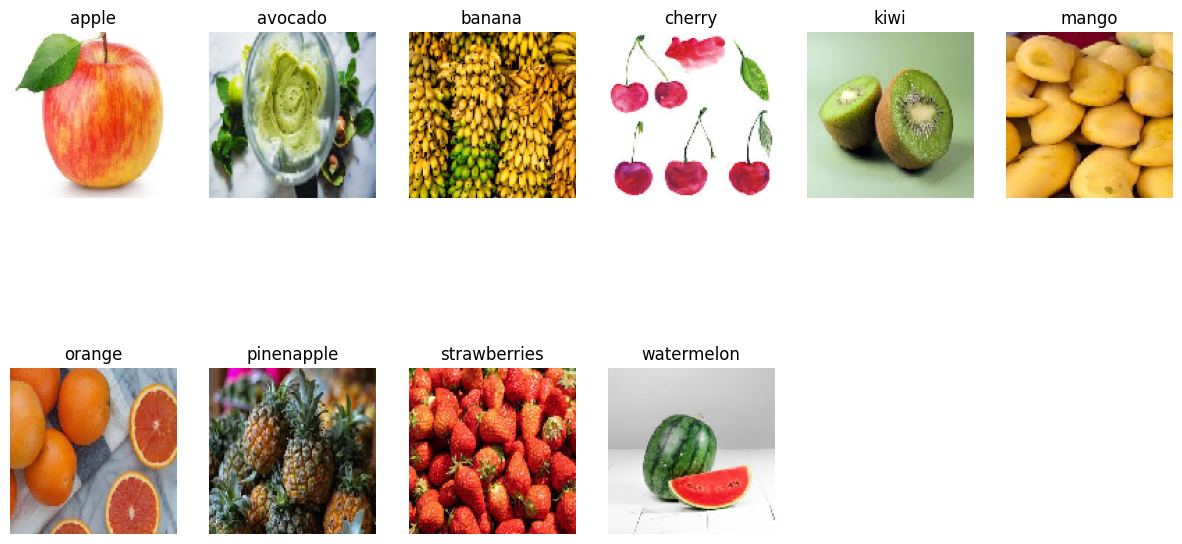

{'apple': 0, 'avocado': 1, 'banana': 2, 'cherry': 3, 'kiwi': 4, 'mango': 5, 'orange': 6, 'pinenapple': 7, 'strawberries': 8, 'watermelon': 9}


In [72]:
import matplotlib.pyplot as plt
import numpy as np

# Set a global seed for reproducibility
tf.random.set_seed(4500)
np.random.seed(4500)
# Diccionario que contiene las clases detectadas por el generador
class_indices = train_data.class_indices
index_to_class = {v: k for k, v in class_indices.items()}  # Invertir el diccionario

# Crear una figura para mostrar las imágenes
plt.figure(figsize=(15, 8))

# Diccionario para rastrear si ya imprimimos una imagen de cada clase
images_shown = {class_name: False for class_name in class_indices.keys()}

# Recorrer el dataset hasta encontrar una imagen por cada clase
for images, labels in train_data:
    for i in range(len(labels)):
        class_index = np.argmax(labels[i])  # Obtener el índice de la clase
        class_name = index_to_class[class_index]  # Obtener el nombre de la clase

        # Si no hemos mostrado una imagen de esta clase, la mostramos
        if not images_shown[class_name]:
            plt.subplot(2, len(class_indices) // 2 + 1, class_index + 1)
            plt.imshow(images[i])
            plt.title(class_name)
            plt.axis('off')

            # Marcamos que ya mostramos una imagen de esta clase
            images_shown[class_name] = True

        # Si ya tenemos una imagen por cada clase, salimos del loop
        if all(images_shown.values()):
            break
    if all(images_shown.values()):
        break

plt.show()
print(train_data.class_indices)  # Para revisar la distribución de clases


<a name="Diseñando-el-modelo-de-red-neuronal"></a>
### Diseñando el modelo de red neuronal

En este proyecto decidimos probar cuatro modelos diferentes con el fin de encontrar la arquitectura más eficiente y precisa para la clasificación de frutas. Cada modelo presentó variaciones en términos de arquitectura, optimizador, tasa de aprendizaje, y técnicas de regularización, como Dropout y Batch Normalization. Estas modificaciones permitieron explorar el impacto de diferentes estrategias sobre el rendimiento y la capacidad de generalización.

El proceso incluyó la prueba de distintos hiperparámetros, como el uso de los optimizadores SGD y Adam, variaciones en el número de neuronas y capas, así como ajustes en la tasa de aprendizaje. Con cada iteración, buscamos encontrar un balance entre precisión y sobreajuste, seleccionando finalmente el modelo 4 que logró una mayor estabilidad y precisión general del 81.59% en la clasificación de frutas del conjunto de validación.

In [75]:



# Establecer la tasa de aprendizaje
learning_rate = 0.001  # Ajusta esta tasa de aprendizaje según sea necesario
optimizer = Adam(learning_rate=learning_rate)

# Definimos el modelo
model1 = Sequential([
    tf.keras.layers.Input(shape=(120, 120, 3)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.Dense(64),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.Dense(16),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.Dense(10, activation='softmax')
])

# Compilamos el modelo con el optimizador que tiene la tasa de aprendizaje personalizada
model1.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Resumen del modelo
model1.summary()


Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_20 (Flatten)            │ (None, 43200)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_62 (Dense)                │ (None, 128)            │     5,529,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_42 (Activation)      │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_63 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_43 (Activation)      │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_64 (Dense)                │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_44 (Activation)      │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_65 (Dense)                │ (None, 10)             │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,539,194 (21.13 MB)

 Trainable params: 5,539,194 (21.13 MB)

 Non-trainable params: 0 (0.00 B)

In [76]:

early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitorea la pérdida de validación
    patience=5,           # Número de épocas sin mejora antes de detener
    restore_best_weights=True,  # Restaura los mejores pesos al final
    verbose=1             # Muestra mensajes durante el entrenamiento
)

history = model1.fit(
    train_data,
    validation_data=test_data,
    epochs=50,
    callbacks=[early_stopping],
)


Epoch 1/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.1165 - loss: 5.1403 - val_accuracy: 0.1404 - val_loss: 2.2919
Epoch 2/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.1072 - loss: 2.2977 - val_accuracy: 0.1170 - val_loss: 2.2971
Epoch 3/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.1460 - loss: 2.2792 - val_accuracy: 0.1373 - val_loss: 2.2848
Epoch 4/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.1773 - loss: 2.2312 - val_accuracy: 0.1950 - val_loss: 2.2166
Epoch 5/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.1957 - loss: 2.2112 - val_accuracy: 0.1997 - val_loss: 2.1944
Epoch 6/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.1827 - loss: 2.2085 - val_accuracy: 0.1326 - val_loss: 2.2754
Epoch 7/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.1887 - loss: 2.1904 - val_accuracy: 0.1903 - val_loss: 2.1565
Epoch 8/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.1865 - loss: 2.1639 - val_accu

In [77]:
# Establecer la tasa de aprendizaje
learning_rate = 0.001  # Ajusta esta tasa de aprendizaje según sea necesario
optimizer = Adam(learning_rate=learning_rate)

# Definimos el modelo
model2 = Sequential([
    tf.keras.layers.Input(shape=(120, 120, 3)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(64),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(10, activation='softmax')
])

# Compilamos el modelo con el optimizador que tiene la tasa de aprendizaje personalizada
model2.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Resumen del modelo
model2.summary()

Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_21 (Flatten)            │ (None, 43200)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_66 (Dense)                │ (None, 128)            │     5,529,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_22          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_45 (Activation)      │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_30 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_67 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_23          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_46 (Activation)      │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_31 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_68 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,539,402 (21.13 MB)

 Trainable params: 5,539,018 (21.13 MB)

 Non-trainable params: 384 (1.50 KB)

In [80]:
history = model2.fit(
    train_data,
    validation_data=test_data,
    epochs=50,
    
)

Epoch 1/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.3396 - loss: 1.7926 - val_accuracy: 0.4399 - val_loss: 1.6470
Epoch 2/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.4077 - loss: 1.6603 - val_accuracy: 0.3058 - val_loss: 1.7539
Epoch 3/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.4331 - loss: 1.5587 - val_accuracy: 0.4431 - val_loss: 1.5014
Epoch 4/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.4561 - loss: 1.4929 - val_accuracy: 0.2527 - val_loss: 2.1412
Epoch 5/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.4883 - loss: 1.4146 - val_accuracy: 0.4087 - val_loss: 1.6766
Epoch 6/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.5393 - loss: 1.3323 - val_accuracy: 0.4493 - val_loss: 1.7104
Epoch 7/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.5593 - loss: 1.2717 - val_accuracy: 0.4275 - val_loss: 1.4301
Epoch 8/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.5839 - loss: 1.1773 - val_accu

In [81]:
# Establecer la tasa de aprendizaje
from tensorflow.keras.optimizers import SGD
optimizer = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)


loss = CategoricalCrossentropy() 
model3 = Sequential([
     tf.keras.layers.Input(shape=(120, 120, 3)),
        tf.keras.layers.Flatten(),

        tf.keras.layers.Dense(128),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.Dropout(0.2),

        tf.keras.layers.Dense(64),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.Dropout(0.2),

        tf.keras.layers.Dense(10, activation='softmax')
])
# Compilamos el modelo con el optimizador que tiene la tasa de aprendizaje personalizada
model3.compile(optimizer=optimizer,
              loss=loss,
              metrics=['accuracy'])

# Resumen del modelo
model3.summary()

Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_22 (Flatten)            │ (None, 43200)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_69 (Dense)                │ (None, 128)            │     5,529,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_47 (Activation)      │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_32 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_70 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_48 (Activation)      │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_33 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_71 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,538,634 (21.13 MB)

 Trainable params: 5,538,634 (21.13 MB)

 Non-trainable params: 0 (0.00 B)

In [82]:
history = model3.fit(
    train_data,
    validation_data=test_data,
    epochs=100,
    callbacks=[early_stopping],
    
    
)

Epoch 1/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.1086 - loss: 5.1426 - val_accuracy: 0.1014 - val_loss: 2.3024
Epoch 2/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.1070 - loss: 2.3021 - val_accuracy: 0.1014 - val_loss: 2.3023
Epoch 3/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.0888 - loss: 2.3023 - val_accuracy: 0.1014 - val_loss: 2.3023
Epoch 4/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.1058 - loss: 2.3032 - val_accuracy: 0.1030 - val_loss: 2.3023
Epoch 5/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.1013 - loss: 2.3022 - val_accuracy: 0.1030 - val_loss: 2.3023
Epoch 5: early stopping
Restoring model weights from the end of the best epoch: 1.


<a name='Entrenamiento-del-modelo'></a>
#### Entrenamiento del modelo

In [84]:
# Establecer la tasa de aprendizaje
from tensorflow.keras.optimizers import SGD
optimizer = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)


loss = CategoricalCrossentropy() 
model4 = Sequential([
     tf.keras.layers.Input(shape=(120, 120, 3)),
        tf.keras.layers.Flatten(),

        tf.keras.layers.Dense(128),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.Dropout(0.2),

        tf.keras.layers.Dense(64),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.Dropout(0.2),

        tf.keras.layers.Dense(10, activation='softmax')
])
# Compilamos el modelo con el optimizador que tiene la tasa de aprendizaje personalizada
model4.compile(optimizer=optimizer,
              loss=loss,
              metrics=['accuracy'])

# Resumen del modelo
model4.summary()


Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_24 (Flatten)            │ (None, 43200)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_75 (Dense)                │ (None, 128)            │     5,529,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_26          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_51 (Activation)      │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_36 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_76 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_27          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_52 (Activation)      │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_37 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_77 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,539,402 (21.13 MB)

 Trainable params: 5,539,018 (21.13 MB)

 Non-trainable params: 384 (1.50 KB)

In [85]:
history = model4.fit(
    train_data,
    validation_data=test_data,
    epochs=100,
)

Epoch 1/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - accuracy: 0.1855 - loss: 2.3783 - val_accuracy: 0.1778 - val_loss: 2.6273
Epoch 2/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.3525 - loss: 1.7601 - val_accuracy: 0.2808 - val_loss: 2.0234
Epoch 3/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.4233 - loss: 1.5942 - val_accuracy: 0.3744 - val_loss: 1.6540
Epoch 4/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.4456 - loss: 1.4882 - val_accuracy: 0.3619 - val_loss: 1.6123
Epoch 5/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.4768 - loss: 1.4204 - val_accuracy: 0.3120 - val_loss: 1.7694
Epoch 6/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.5299 - loss: 1.3106 - val_accuracy: 0.4540 - val_loss: 1.5559
Epoch 7/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.5557 - loss: 1.2349 - val_accuracy: 0.4087 - val_loss: 1.5980
Epoch 8/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.5969 - loss: 1.1435 - 

In [86]:
model4.save('mi_modelo.h5')


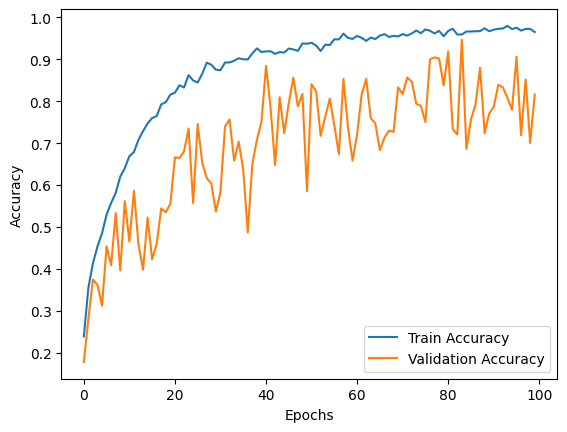

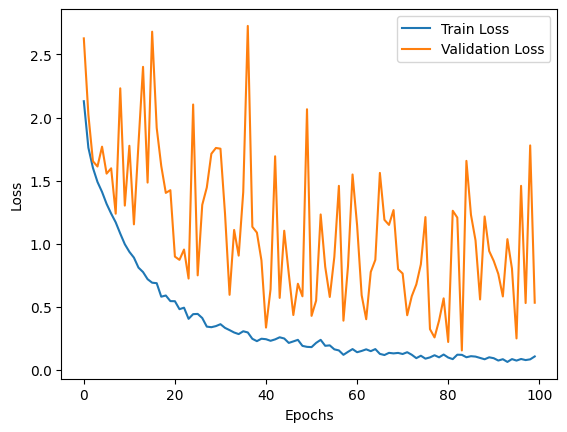

In [87]:
import matplotlib.pyplot as plt

# Gráfica de precisión
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Gráfica de pérdida
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Entrenamiento (training): La precisión (accuracy) en el conjunto de entrenamiento mejora de forma relativamente estable a medida que avanzan las épocas. La pérdida (loss) también disminuye de manera gradual, lo cual indica que la red está aprendiendo y ajustando los pesos correctamente.

Ejemplo de progreso:

Época 1: accuracy: 0.1855, loss: 2.3783
Época 12: accuracy: 0.6882, loss: 0.8741
Época 41: accuracy: 0.9225, loss: 0.2484
El modelo muestra mejoras consistentes, lo cual es esperable al entrenarse con retropropagación. Sin embargo, las métricas de validación presentan un patrón más errático.

A lo largo de las épocas se observan altos picos y caídas en la pérdida de validación (val_loss) y en la precisión (val_accuracy). Aquí es donde surgen los picos dispersos y fluctuaciones. En algunas épocas, la precisión de validación cae drásticamente, y la pérdida de validación sube, mientras que en otras se observa un aumento repentino en la precisión

El comportamiento irregular del modelo sugiere problemas de generalización, posiblemente causados por la base de datos no tiene suficientes imagenes o no son de la mejor calidad para lo que busca el modelo, lo que impide al modelo aprender patrones representativos. Además, dado que no estamos utilizando redes neuronales convolucionales (CNNs), el modelo pierde la capacidad de extraer características visuales complejas y estructurales propias de las imágenes, lo que reduce su rendimiento.



<a name='Evaluación-del-modelo'></a>
#### Evaluación del modelo

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step

Classification Report:
              precision    recall  f1-score   support

       apple       0.40      1.00      0.57        63
     avocado       0.88      0.92      0.90        64
      banana       1.00      0.57      0.72        60
      cherry       0.94      0.94      0.94        66
        kiwi       1.00      0.65      0.79        66
       mango       0.90      0.88      0.89        65
      orange       0.96      0.87      0.92        63
  pinenapple       0.98      0.71      0.82        65
strawberries       0.98      0.83      0.90        66
  watermelon       1.00      0.78      0.88        63

    accuracy                           0.82       641
   macro avg       0.90      0.81      0.83       641
weighted avg       0.91      0.82      0.83       641



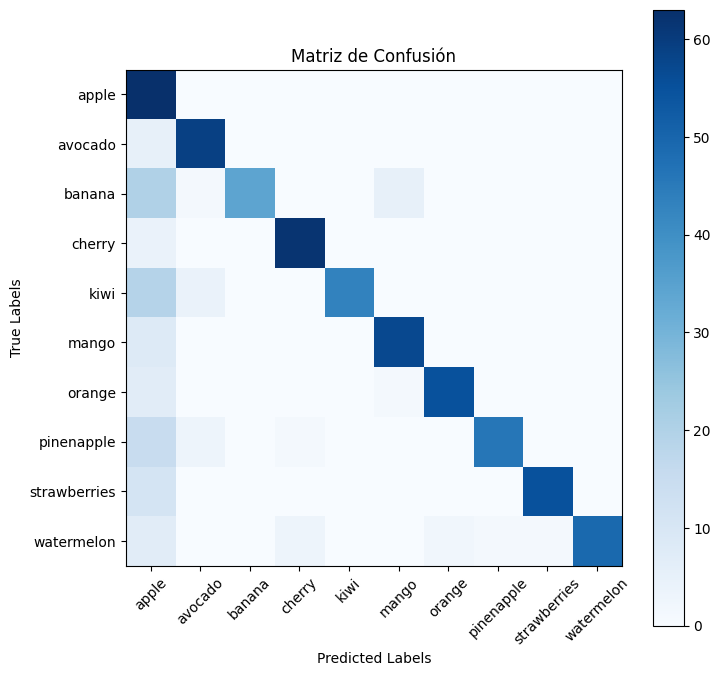

In [94]:


# Obtener predicciones en el conjunto de validación
predictions = model4.predict(test_data)
predicted_classes = np.argmax(predictions, axis=1)  # Convertir probabilidades a etiquetas
true_classes = test_data.classes  # Etiquetas reales

# Imprimir clasificación y matriz de confusión
print("\nClassification Report:")
print(classification_report(true_classes, predicted_classes, target_names=list(test_data.class_indices.keys())))

# Generar la matriz de confusión
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Mostrar la matriz de confusión usando Matplotlib
plt.figure(figsize=(8, 8))
plt.imshow(conf_matrix, cmap='Blues')
plt.title('Matriz de Confusión')
plt.colorbar()
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks(np.arange(len(test_data.class_indices)), list(test_data.class_indices.keys()), rotation=45)
plt.yticks(np.arange(len(test_data.class_indices)), list(test_data.class_indices.keys()))
plt.show()

En este reporte podemos observar varias cosas:

Apple presenta un rendimiento problemático: aunque tiene un recall de 1.00, su precisión es baja (0.40), lo que sugiere que clasifica erróneamente otras frutas como "apple".

Banana y kiwi también muestran desequilibrios con altos valores en algunas métricas pero bajos en otras (por ejemplo, banana tiene una precisión perfecta pero un recall bajo).

Cherry, mango, orange, strawberries, y watermelon muestran buenos resultados en general, con f1-scores altos, indicando un mejor equilibrio entre precisión y recall.

El modelo tiene una precisión global del 82%, pero la macro media del recall (0.81) sugiere que no todas las clases están bien representadas. Esto indica que algunas clases (como apple) están siendo clasificadas de forma inconsistente.

La falta de características visuales más robustas (como las proporcionadas por redes convolucionales) podría estar afectando los resultados.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


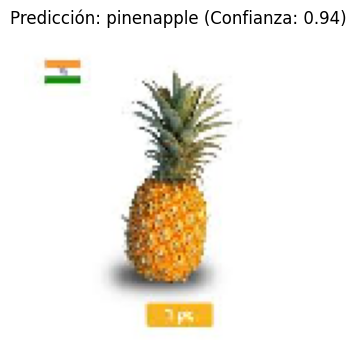

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


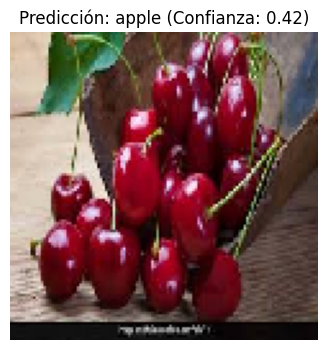

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


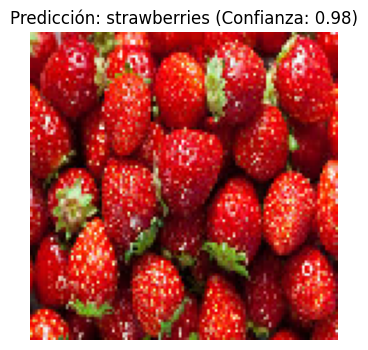

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


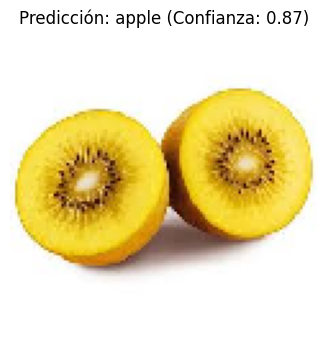

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


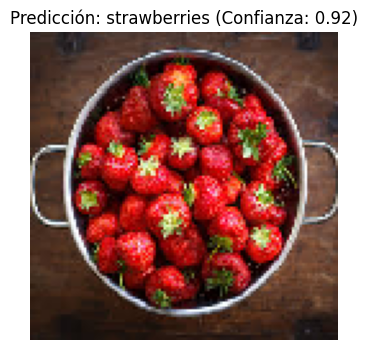

In [102]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Obtener el mapeo de índice a nombre de clase
class_indices = train_data.class_indices  # Asumimos que 'train_data' tiene las clases correctas
index_to_class = {v: k for k, v in class_indices.items()}  # Invertimos el diccionario

# Función para mostrar imágenes y predicciones aleatorias
def mostrar_imagenes_y_predicciones(model, data_generator, num_imagenes=5):
    # Obtener las rutas de las imágenes del directorio predict
    filepaths = data_generator.filepaths

    # Seleccionar aleatoriamente las imágenes
    random_indices = np.random.choice(len(filepaths), size=num_imagenes, replace=False)

    # Iterar sobre las imágenes seleccionadas
    for idx in random_indices:
        # Cargar la imagen desde su ruta
        img_path = filepaths[idx]
        img = load_img(img_path, target_size=IMG_SIZE)  # Redimensionamos la imagen
        img_array = img_to_array(img) / 255.0  # Normalizamos entre 0 y 1
        img_array = np.expand_dims(img_array, axis=0)  # Expandimos para formar un batch (1, 120, 120, 3)

        # Hacer la predicción
        prediction = model.predict(img_array)
        predicted_class = np.argmax(prediction, axis=1)[0]  # Clase con mayor probabilidad
        confidence = np.max(prediction)  # Probabilidad más alta

        # Obtener el nombre de la clase predicha
        class_name = index_to_class[predicted_class]

        # Mostrar la imagen junto con la predicción
        plt.figure(figsize=(4, 4))
        plt.imshow(img)
        plt.title(f"Predicción: {class_name} (Confianza: {confidence:.2f})")
        plt.axis('off')
        plt.show()

# Llamar a la función para mostrar 5 imágenes aleatorias con sus predicciones
mostrar_imagenes_y_predicciones(model4, predict_data, num_imagenes=5)


En esta sección se evalúa el rendimiento del modelo al predecir la clase de fruta en cinco imágenes específicas. El objetivo es verificar si el modelo puede reconocer correctamente las frutas en diferentes condiciones, considerando posibles variaciones en color, forma o iluminación. Como se puede observar en algunos ejemplos es correcta la predicción mientras en otros no. Aunque en la mayaría resulta ser correcto.

<a name='conclusiones'></a>
## Conclusiones

Reporte del Proyecto: Clasificación de Frutas con una Red Neuronal
1. Limitaciones de una red neuronal profunda en tareas complejas
El uso de redes neuronales profundas tiene varias limitaciones en tareas complejas, como:

Requiere grandes volúmenes de datos: Las redes profundas necesitan muchos datos para aprender correctamente sin sobreajustarse.
Alto costo computacional: El entrenamiento puede ser lento, especialmente para arquitecturas más complejas.
Dificultad de interpretación: Las decisiones de las redes neuronales no son fácilmente interpretables, lo que puede limitar la confianza en los resultados.
Sensibilidad a los hiperparámetros: Si los hiperparámetros no se ajustan correctamente, el modelo puede no converger o tener un desempeño deficiente.
En nuestro caso, el modelo alcanzó una precisión razonable, pero todavía tiene limitaciones, como la baja capacidad de algunas clases para generalizar correctamente (como el caso de las manzanas o bananas).

2. ¿Pudo el modelo perceptrón capturar la relación entre entradas y salidas en esta aplicación?
En nuestro modelo, el perceptrón multicapa utilizado (con varias capas densas) logró capturar de forma adecuada la relación entre las imágenes de frutas y sus clases respectivas, alcanzando una precisión global del 82%. Sin embargo, algunas frutas visualmente similares (como manzanas y naranjas) presentaron confusión. Esto indica que la capacidad del modelo es buena, pero limitada en ciertas clases, lo que sugiere que características visuales más complejas podrían requerir una red convolucional (CNN).

3. ¿Pudo el modelo aprender más rápido con valores grandes de la tasa de aprendizaje?
El SGD con tasa de aprendizaje inicial de 0.01, junto con momentum y Nesterov, proporcionó un equilibrio razonable entre rapidez de convergencia y estabilidad. Aumentar la tasa de aprendizaje más allá de este valor causó inestabilidad en la convergencia, llevando a fluctuaciones en la pérdida y la precisión. Por lo tanto, descubrimos que un valor moderado de 0.01 fue el más adecuado.

4. ¿Fue necesario normalizar/escalar las variables predictoras? ¿Por qué?
Sí, fue necesario escalar las imágenes con un factor de 1/255. Esto se debe a que los valores de los píxeles originales oscilan entre 0 y 255. Sin normalización, las activaciones de las neuronas podrían haber sido muy grandes, causando problemas en el entrenamiento, como explosión del gradiente. Escalar los valores a un rango de 0-1 permite que el modelo aprenda más rápido y de manera estable.

5. Estrategias seguidas para ajustar los hiperparámetros
Se realizaron las siguientes estrategias:

Tasa de aprendizaje: Probamos varios valores y seleccionamos 0.01 para un equilibrio entre estabilidad y rapidez.
Batch size: Se usó 32, que es un valor estándar que permite un buen balance entre velocidad y estabilidad.
Regularización: Usamos Batch Normalization y Dropout para evitar sobreajuste.
Número de épocas: Fijamos el número de épocas en 100, pero monitorizamos los resultados en cada época para evitar entrenamiento excesivo.
Early Stopping: Evaluamos esta opción para evitar que el modelo entrenara más allá del punto óptimo.
6. ¿El proceso de aprendizaje siempre convergió? ¿Si no, cuál fue la razón?
No siempre logramos la convergencia en los primeros intentos. Las razones incluyeron:

Tasa de aprendizaje incorrecta: Valores demasiado altos causaban inestabilidad.
Modelo sobreajustado: Algunas clases (como manzana) tuvieron problemas debido a la similitud con otras frutas, lo que generó fluctuaciones en las métricas de precisión y recall.
Datos insuficientes: En algunas clases, como banana, la baja cantidad de datos o características confusas impidieron que el modelo aprendiera todas las relaciones correctamente.
7. ¿Qué mejoras pueden adoptarse para resolver el problema de manera más eficiente y robusta?
Redes Convolucionales (CNN): Dado que estamos trabajando con imágenes, una CNN sería más eficiente al capturar características espaciales relevantes, como texturas y formas.
Aumento de datos: Técnicas como rotación, volteo y escalado podrían mejorar la generalización del modelo.
Transfer Learning: Usar modelos pre-entrenados como MobileNet o ResNet permitiría aprovechar características ya aprendidas en otros datasets grandes.
Hiperparámetros dinámicos: Implementar un optimizador avanzado como Adam con tasa de aprendizaje adaptativa podría mejorar la convergencia.
8. Conclusiones personales del equipo
En este proyecto logramos implementar una red neuronal densa para la clasificación de imágenes de frutas, alcanzando una precisión global del 82%. Aprendimos que:

La normalización de los datos es crítica para la estabilidad del entrenamiento.
La elección correcta de la tasa de aprendizaje es fundamental para asegurar una convergencia adecuada.
A pesar de que el modelo es funcional, el uso de redes convolucionales habría mejorado significativamente el desempeño.
El proyecto nos permitió explorar la importancia del ajuste de hiperparámetros y los desafíos inherentes al trabajar con datos complejos como imágenes. Aunque logramos un modelo funcional, existen áreas claras de mejora, como el uso de redes más avanzadas y el aumento del dataset para mejorar la generalización.



<a name='referencias'></a>
## Referencias

Goodfellow, I., Bengio, Y., & Courville, A. (2016). Deep Learning. MIT Press.
Chollet, F. (2018). Deep Learning with Python. Manning Publications.
Zhang, Y., & Wallace, B. C. (2017). A Sensitivity Analysis of (and Practitioners’ Guide to) Convolutional Neural Networks for Sentence Classification. arXiv preprint arXiv:1510.03820.